In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

In [2]:
## 축약 없애기.
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
##feature_names = ['TransactionValue', 'MarketCap', 'Sales', 'TotalAssets', 'TotalLiabilities', 'OperatingProfit', 'SalesGrowthRate', 'OperatingProfitGrowthRate', 'ForeignerRatio', 'PER', 'ROE', 'ROA', 'PBR', 'ReservationRatio', 'DebtRatio', 'BlueChip']

In [4]:
##feature_names = ['TotalAssets', 'SalesGrowthRate', 'OperatingProfitGrowthRate', 'ForeignerRatio', 'PER', 'ROA', 'ReservationRatio', 'DebtRatio', 'BlueChip']

In [5]:
feature_names = [ 'MarketCap', 'TotalAssets', 'OperatingProfitGrowthRate', 'ForeignerRatio', 'PER', 'ReservationRatio', 'DebtRatio', 'BlueChip']

### 데이터 불러오기 & 결측치 제거

In [6]:
df_stock = pd.read_excel("C:/Users/dohyung/Documents/카카오톡 받은 파일/Naver(우량주)-2 (1).xlsx")
df_stock = df_stock[feature_names]

##결측치 제거
df_stock = df_stock.dropna(axis=0)

### 데이터 Scaling


In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler=RobustScaler()

#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
##학습데이터 세트에서 변환을 위한 기반 설정(예를 들어 학습 데이터 세트의 최대값/최소값등)을 먼저 fit()을 통해서 설정한 뒤에
## 이를 기반으로 학습 데이터의 transform()을 수행하되 학습 데이터에서 설정된 변환을 위한 기반 설정을 그대로 테스트 데이터에도 적용하기 위해서.
scaler.fit(df_stock)
stock_scaled = scaler.transform(df_stock)

#transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
x_stock_df_scaled_sub= pd.DataFrame(data=stock_scaled, columns=df_stock.columns)

## 우리가 알고싶은 것은 종목을 우량주와 보통주로 분류하는 것이다.
##NaN값 0으로
x_stock_df_scaled_sub.fillna(0, inplace=True)

### 컬럼별 이상치를 찾기위한 산점도

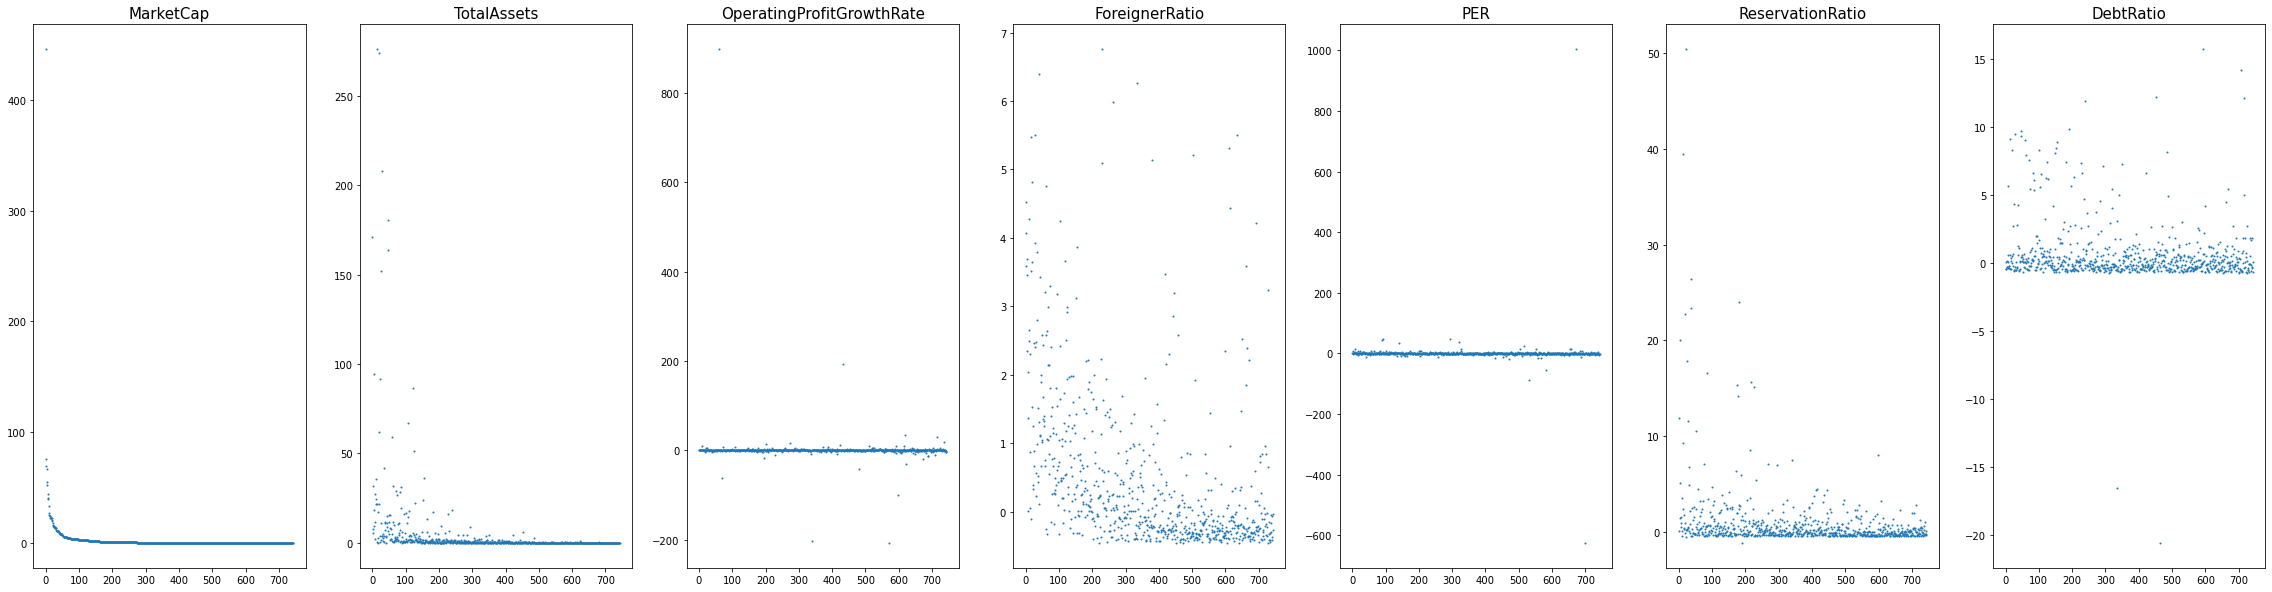

In [8]:
ncols = 7
nrows = 2
fig1,ax1=plt.subplots(ncols=ncols, figsize=(40,10))
for i in range(0, ncols):
            ax1[i].set_title(x_stock_df_scaled_sub.columns[i], fontsize = 15)
            ax1[i].scatter(range(len(x_stock_df_scaled_sub.index)), x_stock_df_scaled_sub[feature_names[i]], s=1)

### 이상치값 제거

In [9]:
idx_1 = list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['MarketCap'] > 50].index)
idx_1 = idx_1 + list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['TotalAssets'] > 50].index)
idx_1 = idx_1 + list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['OperatingProfitGrowthRate'] > 20].index)
idx_1 = idx_1 + list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['OperatingProfitGrowthRate'] < -20].index)
idx_1 = idx_1 + list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['ForeignerRatio'] > 5].index)
idx_1 = idx_1 + list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['PER'] > 20].index)
idx_1 = idx_1 + list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['PER'] < -20].index)
idx_1 = idx_1 + list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['ReservationRatio'] > 20].index)
idx_1 = idx_1 + list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['DebtRatio'] > 8].index)
idx_1 = idx_1 + list(x_stock_df_scaled_sub[x_stock_df_scaled_sub['DebtRatio'] < -10].index)
idx_1 = list(set(idx_1))

In [10]:
#transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
x_stock_df_scaled= pd.DataFrame(data=stock_scaled, columns=df_stock.columns)

## 우리가 알고싶은 것은 종목을 우량주와 보통주로 분류하는 것이다.
##NaN값 0으로
x_stock_df_scaled.fillna(0, inplace=True)

In [11]:
x_stock_df_scaled = x_stock_df_scaled.drop(idx_1, axis=0)

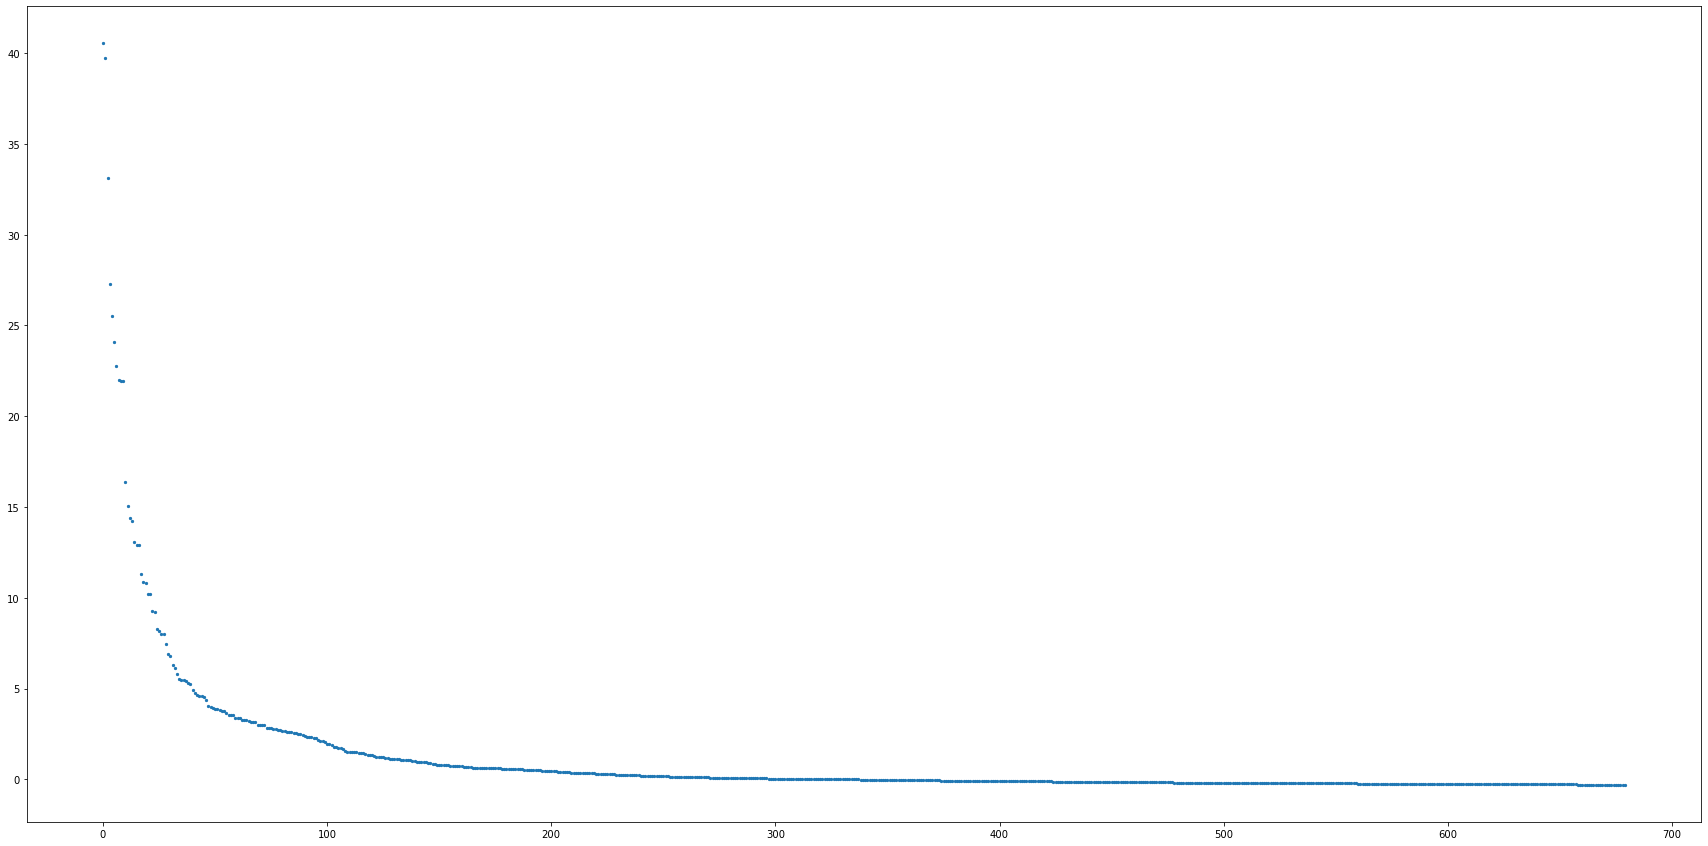

In [12]:
plt.figure(figsize=(30,15))
plt.scatter(range(len(x_stock_df_scaled['MarketCap'])), x_stock_df_scaled['MarketCap'], s = 5)

## 제거 후 산점도

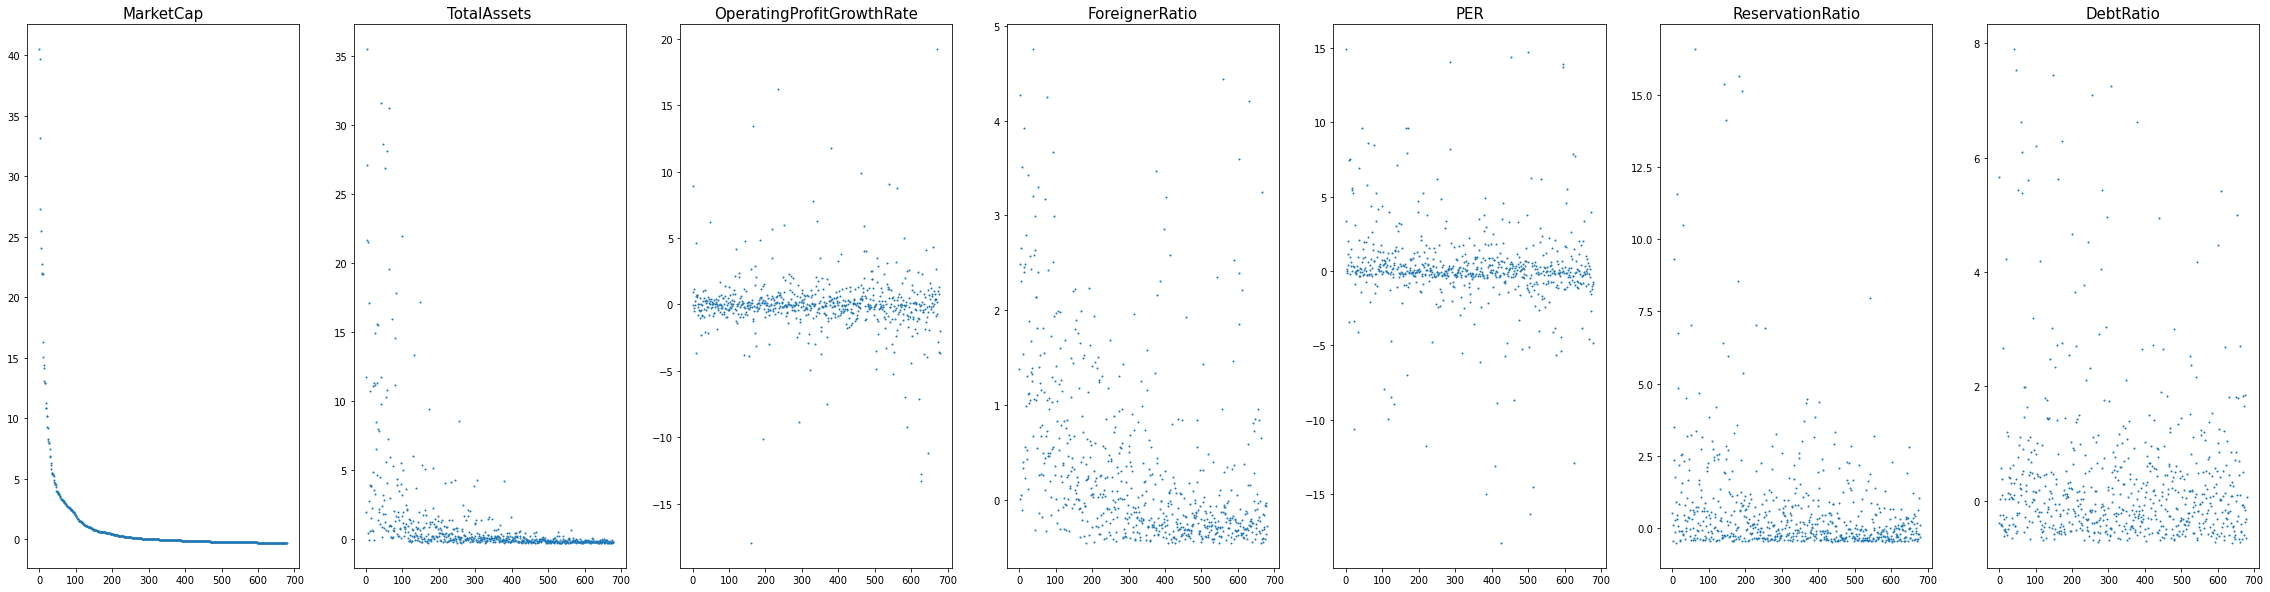

In [13]:
ncols = 7
nrows = 2
fig1,ax1=plt.subplots(ncols=ncols, figsize=(40,10))
for i in range(0, ncols):
    
            ax1[i].set_title(x_stock_df_scaled.columns[i], fontsize = 15)
            ax1[i].scatter(range(len(x_stock_df_scaled.index)), x_stock_df_scaled[feature_names[i]], s=1)

In [14]:
y_stock_df = x_stock_df_scaled['BlueChip']
x_stock_df_scaled = x_stock_df_scaled.drop(['BlueChip'], axis=1)
y_stock_df[y_stock_df< 0] = 0
y_stock_df[y_stock_df> 0] = 1

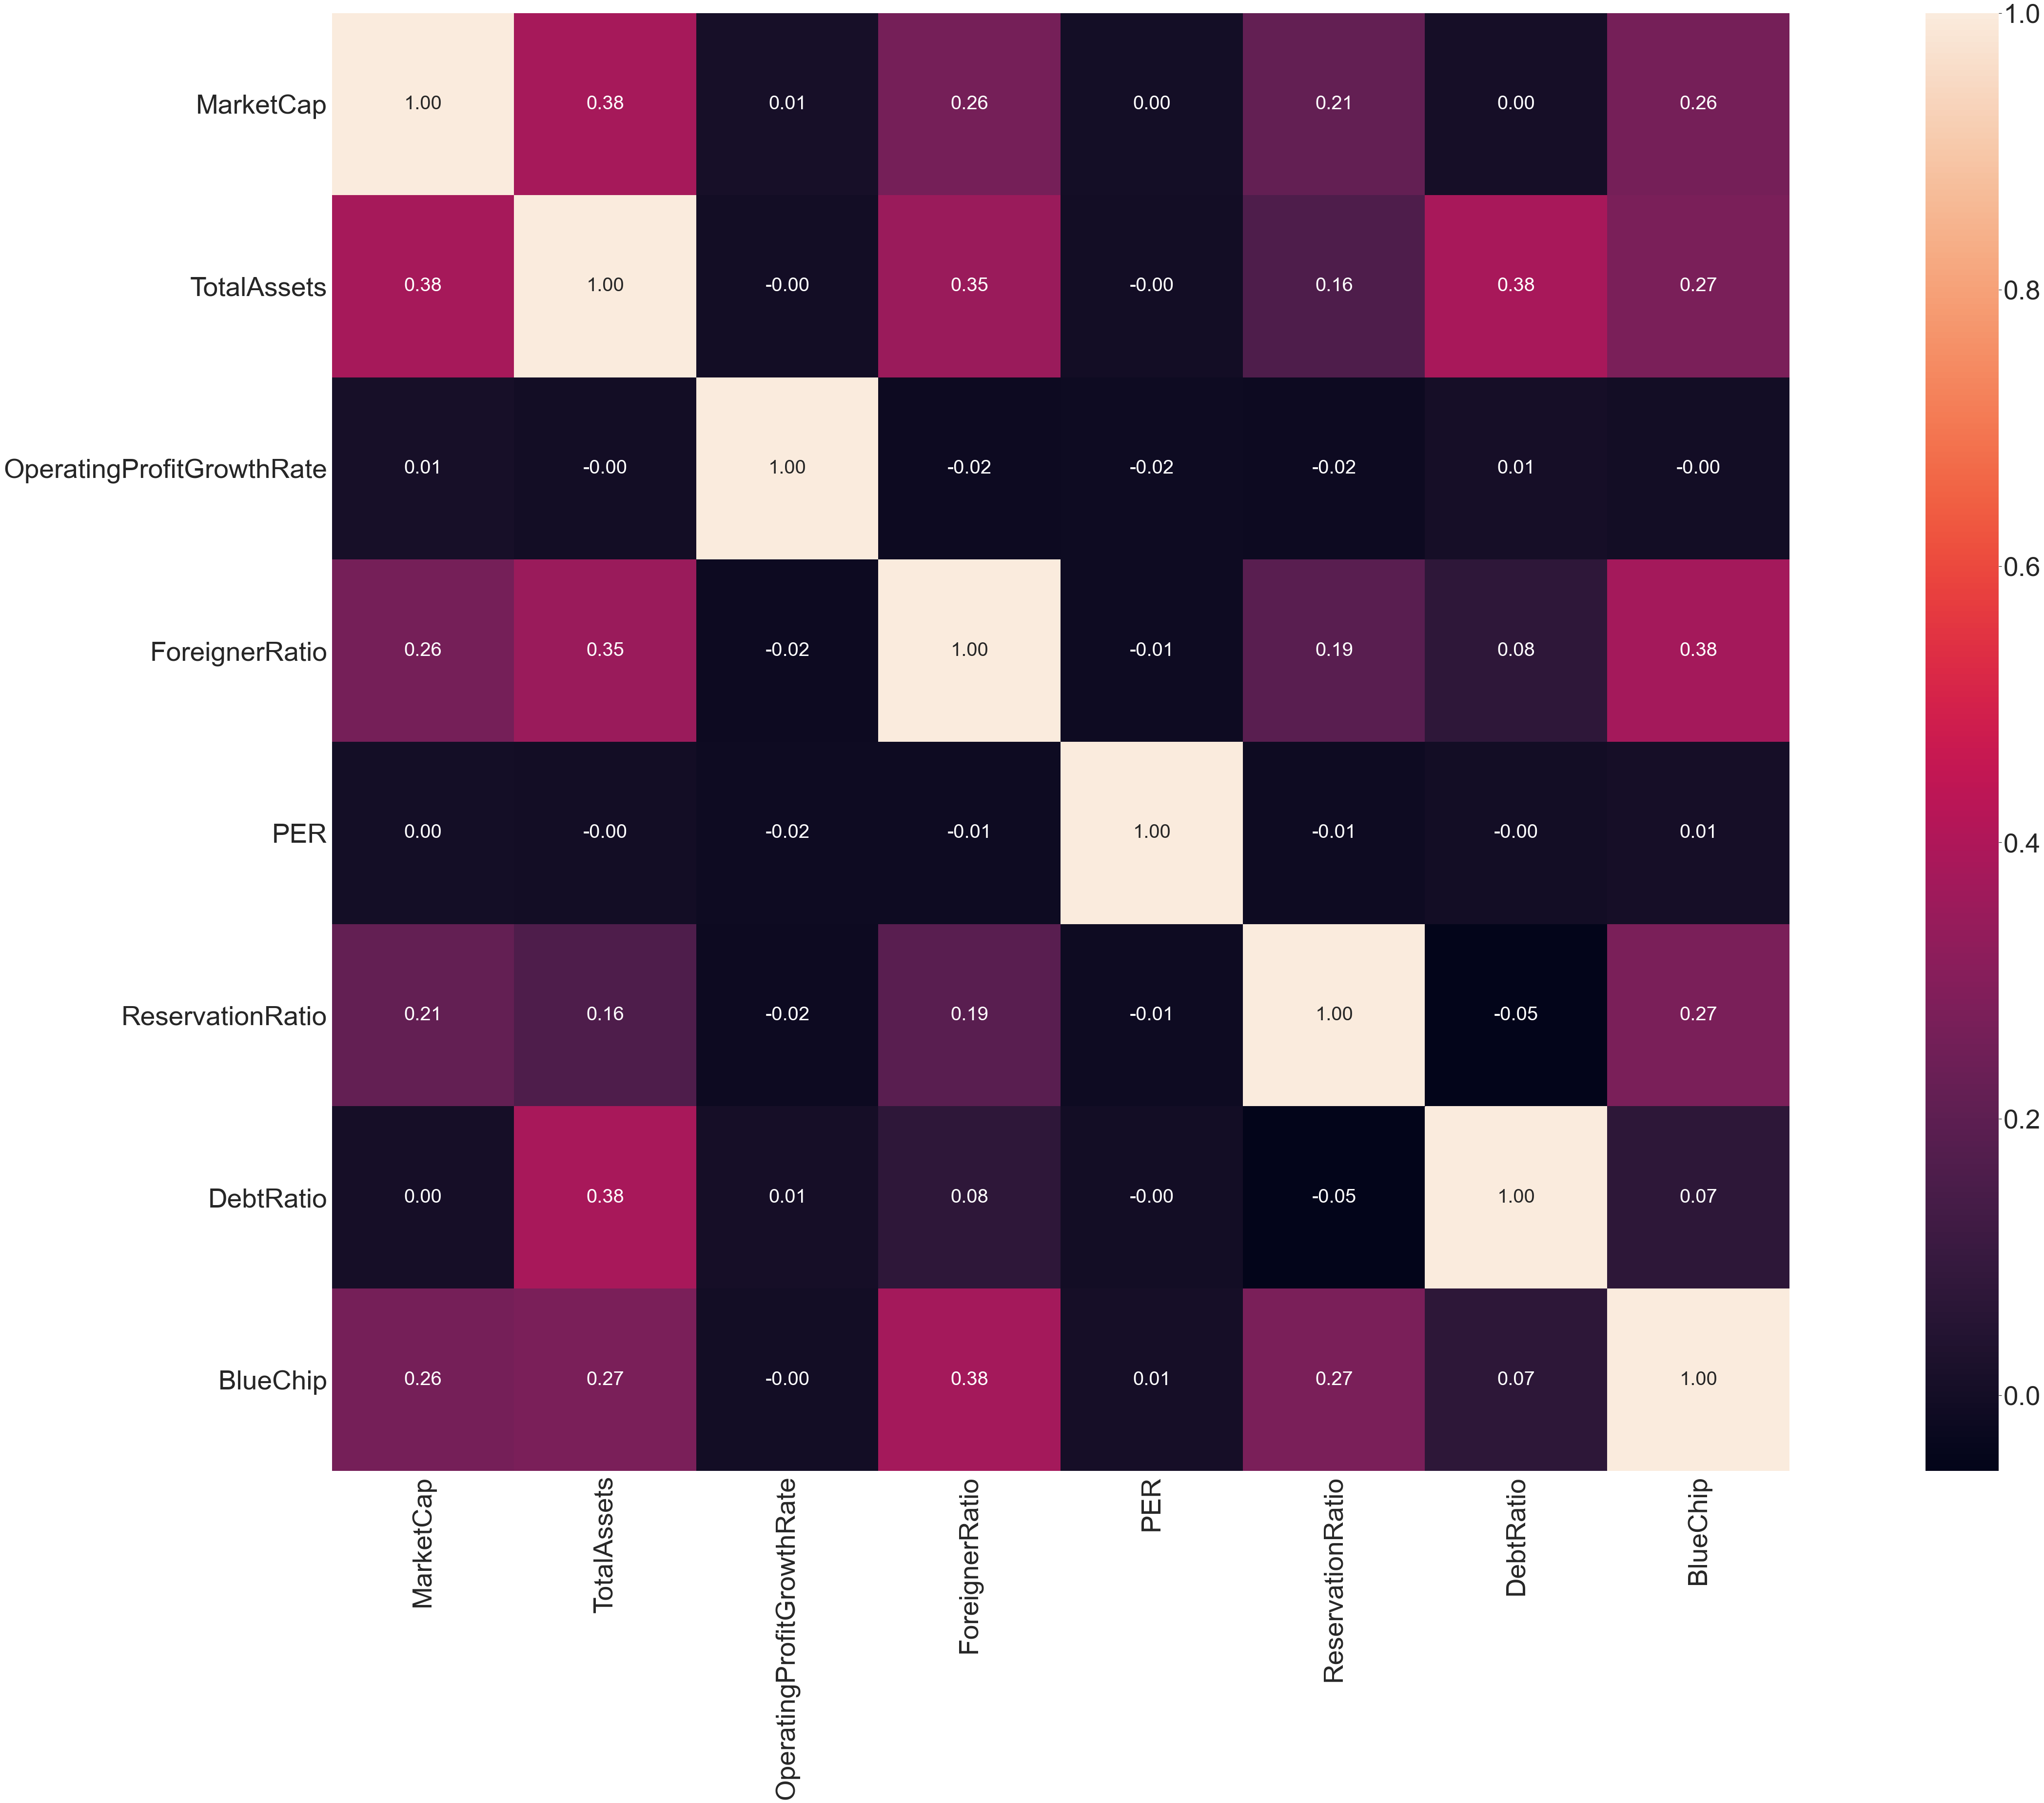

In [15]:
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

cm = np.corrcoef(df_stock[feature_names].values.T)

sns.set(font_scale=5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 40},yticklabels=feature_names,xticklabels=feature_names)
plt.gcf().set_size_inches(100,55)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x_stock_df_scaled, y_stock_df,test_size=.2,random_state=11)

## 1. 랜덤포레스트(RandomForestClassifier)
- 장점 : 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
- 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
- 다양한 분야에서 좋은 성능을 나타냄
###  
- 단점 : 하이퍼 파라미터가 많아 튜닝을 위힌 시간이 많이 소요됨

#### n_estimators - 결정트리의 갯수를 지정
- Default = 10
- 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음

#### min_samples_split	- 노드를 분할하기 위한 최소한의 샘플 데이터수
- 과적합을 제어하는데 사용
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

#### min_samples_leaf	- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요

#### max_features	- 최적의 분할을 위해 고려할 최대 feature 개수
- Default = 'auto' (결정트리에서는 default가 none이었음)
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정

#### max_depth	- 트리의 최대 깊이
- default = None
- 완벽하게 클래스 값이 결정될 때 까지 분할
- 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요

#### max_leaf_nodes	리프노드의 최대 개수

### 랜덤포레스트 최적의 파라미터값 찾기
#### 그리드 서치 CV (Grid Search CV)
- Grid search (격자 탐색) 은 모델 하이퍼 파라미터에 넣을 수 있는 값들을 순차적으로 입력한뒤에 가장 높은 성능을 보이는 하이퍼 파라미터들을 찾는 탐색 방법이다. 

- 그리드 서치는 우리가 딕셔너리에 지정한 모든 값을 다 탐색해야만 한다. 이는 사람이 임의로 정한 값이기 때문에, 어떤 값이 효과적일지는 알 수 없고, 한번씩 모델은 다 생성되어야 하는 상황


In [17]:
def GSCV(clf, parameters, x_train, y_train):
    grid_rf = GridSearchCV(clf, param_grid=parameters, cv=3)
    grid_rf.fit(x_train, y_train)
    score_df = pd.DataFrame(grid_rf.cv_results_)
    print(score_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']])
    print(grid_rf.best_score_)
    print(grid_rf.best_params_)

In [18]:
parameters = { 'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 3, 4, 5], 'min_samples_split' : [4, 5, 6, 7]}
GSCV(RandomForestClassifier(), parameters, x_train, y_train)

                                                              params  \
0   {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 4}   
1   {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 5}   
2   {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 6}   
3   {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 7}   
4   {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 4}   
5   {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5}   
6   {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 6}   
7   {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 7}   
8   {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 4}   
9   {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 5}   
10  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 6}   
11  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 7}   
12  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split'

### 최종 파라미터 튜닝값

In [21]:
import eli5
from eli5.sklearn import PermutationImportance

def Permutation(clf, x_stock_scaled, y_stock, feature_names):
    x_train, x_val, y_train, y_val = train_test_split(x_stock_scaled, y_stock, random_state=1)
    perm = PermutationImportance(clf.fit(x_train, y_train), random_state=1).fit(x_val, y_val)
    return eli5.show_weights(perm, feature_names = x_val.columns.tolist())

In [31]:
def clf_score(clf, x_train,x_test,y_train,y_test):
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

In [32]:
rf_clf = RandomForestClassifier(criterion='gini', max_depth = 4, min_samples_split = 4)
clf_score(rf_clf, x_train,x_test,y_train,y_test)
Permutation(rf_clf, x_stock_df_scaled, y_stock_df, feature_names)

정확도: 0.9191


Weight,Feature
0.0329 ± 0.0141,MarketCap
0.0129 ± 0.0202,TotalAssets
0.0094 ± 0.0160,ForeignerRatio
0.0059 ± 0.0074,ReservationRatio
0.0059 ± 0.0166,OperatingProfitGrowthRate
0.0012 ± 0.0088,PER
-0.0024 ± 0.0094,DebtRatio


### 시각화

In [33]:
##from sklearn.tree import export_graphviz
##import os 
##os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'


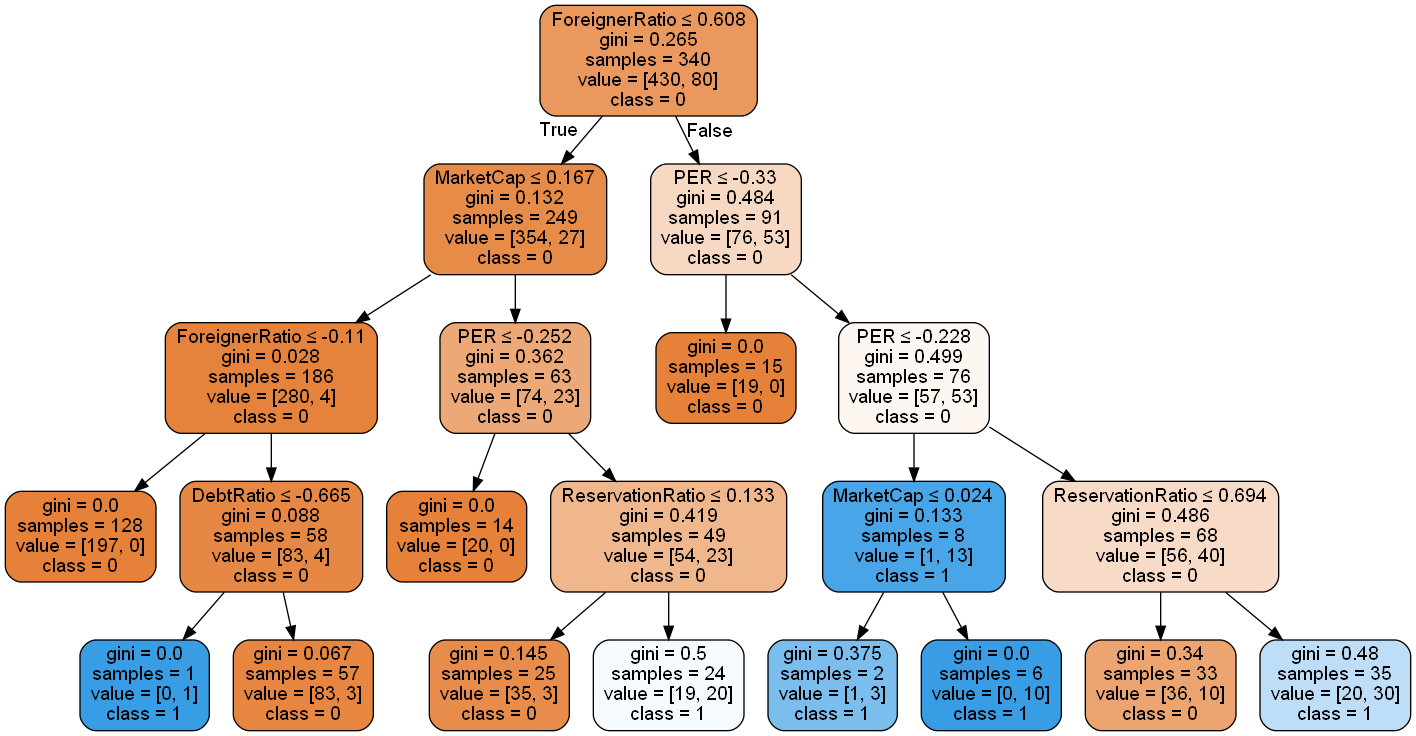

In [34]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import graphviz
import pydotplus

estimator = rf_clf.estimators_[1]
target_name = np.array(['0','1'])
dt_dot_data = tree.export_graphviz(estimator,feature_names = feature_names[0:7],
                                  class_names = target_name,
                                  filled=True, rounded=True,
                                  special_characters=True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

### 

### 

## 2. 로지스틱 회귀분석

### Logistic Regression은 데이터가 특정 카테고리에 속할지를 0과 1사이의 연속적인 확률로 예측하는 회귀 알고리즘 중 하나이다. 확률에 기반하여 특정 데이터가 어떤 카테고리에 속할지를 결정하게 되고, 궁극적으로 classification문제를 풀게 된다.

### LogisticRegression(C, max_iter)
##### penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)
- l1: 맨하튼 거리, 오차 = 오차 + alpha * (|w1| + |w2|)
- l2: 유클리디안 거리의 제곱, 오차 = 오차 + alpha * (W1^2 + w2^2) 가중치 규제 (특성 수 줄이기, 과대적합 방지)
- none: 가중치 규제 미사용


##### C : 규제 강도 (C값은 커질 수록 그 규제 정도가 약해진다. 0에가까울수록 규제정도가 강해진다.)
##### max_iter : 계산에 사용할 작업 수 (오류가 날경우 값을 크게해주자.)

### 그리드 서치 CV

In [35]:
parameters = {'C':[0.01, 0.1, 1, 100, 1000], 'max_iter' : [1000]}
GSCV(LogisticRegression(), parameters, x_train, y_train)

                          params  mean_test_score  rank_test_score  \
0  {'C': 0.01, 'max_iter': 1000}         0.891567                1   
1   {'C': 0.1, 'max_iter': 1000}         0.887864                2   
2     {'C': 1, 'max_iter': 1000}         0.886032                3   
3   {'C': 100, 'max_iter': 1000}         0.886032                3   
4  {'C': 1000, 'max_iter': 1000}         0.886032                3   

   split0_test_score  split1_test_score  split2_test_score  
0           0.879121           0.895028           0.900552  
1           0.890110           0.878453           0.895028  
2           0.884615           0.883978           0.889503  
3           0.884615           0.883978           0.889503  
4           0.884615           0.883978           0.889503  
0.8915669965393723
{'C': 0.01, 'max_iter': 1000}


### 각 변수별 가중치

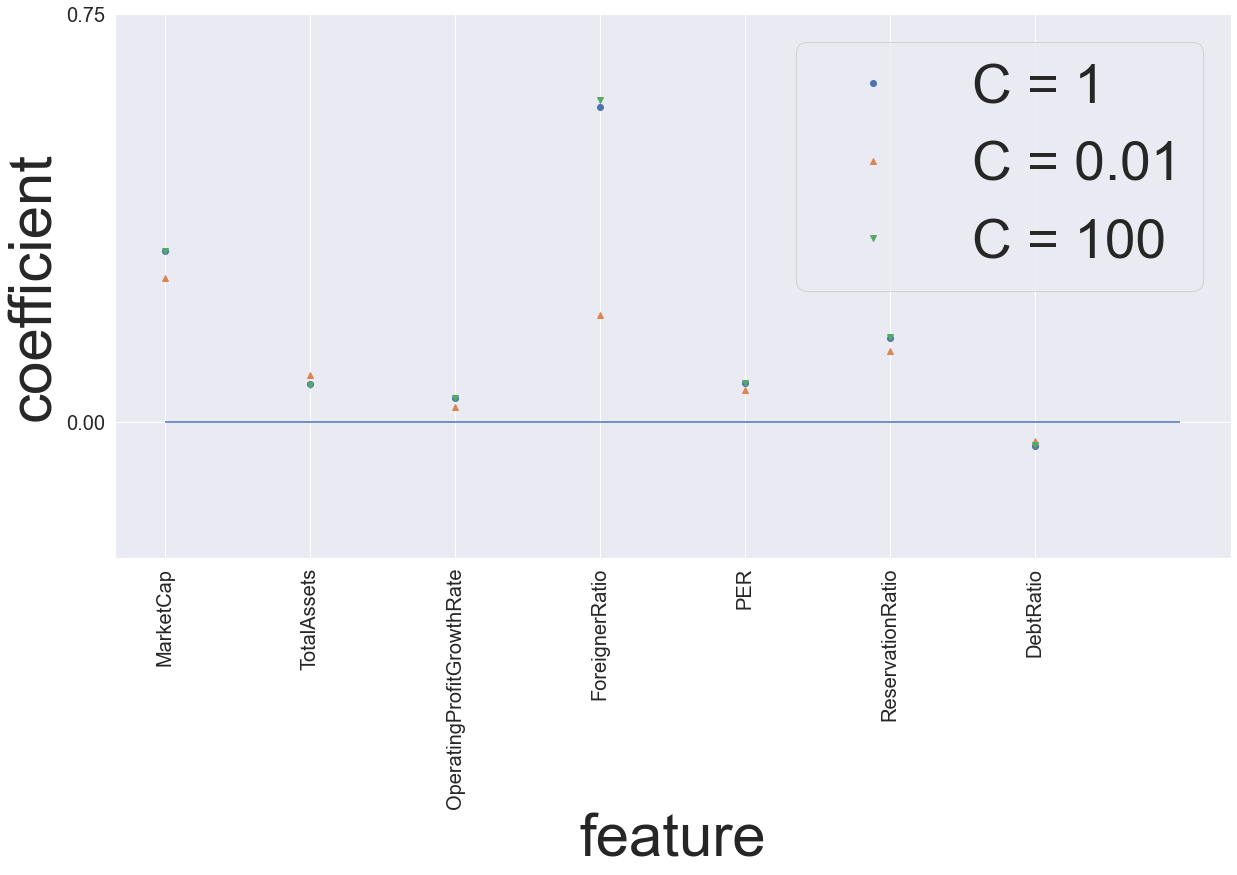

In [36]:
lr_clf = LogisticRegression(C=1, max_iter= 1000).fit(x_train, y_train)
lr_clf001 = LogisticRegression(C=0.01, max_iter= 1000).fit(x_train, y_train)
lr_clf100 = LogisticRegression(C=100, max_iter= 1000).fit(x_train, y_train)

plt.figure(figsize=(20,10))

plt.plot(lr_clf.coef_.T, "o", label = "C = 1")
plt.plot(lr_clf001.coef_.T, "^", label = "C = 0.01")
plt.plot(lr_clf100.coef_.T, "v", label = "C = 100")

plt.xticks(range(x_stock_df_scaled.shape[1]), feature_names[:7], rotation=90, fontsize=20)
plt.yticks([-0.75, 0, 0.75], fontsize=20)
plt.hlines(0,0,x_stock_df_scaled.shape[1])
plt.xlabel("feature")
plt.ylabel("coefficient")
plt.ylim(-0.25, 0.75)
plt.legend()


In [37]:
clf_score(lr_clf, x_train,x_test,y_train,y_test)

정확도: 0.9118


### Permutation features importance

In [38]:
Permutation(lr_clf, x_stock_df_scaled, y_stock_df, feature_names)

Weight,Feature
0.0400 ± 0.0115,MarketCap
0.0071 ± 0.0047,PER
0.0071 ± 0.0088,ForeignerRatio
0.0059 ± 0.0000,TotalAssets
0.0035 ± 0.0094,ReservationRatio
0.0000 ± 0.0074,OperatingProfitGrowthRate
-0.0012 ± 0.0047,DebtRatio


## 3. KNN
- 분류(Classification)와 회귀(Regression) 를 모두 지원한다.
- 예측하려는 데이터와 input 데이터들 간의 거리를 측정해 가장 가까운 K개의 데이터셋의 레이블을 참조해 분류/예측한다.
- 학습시 단순히 input 데이터들을 저장만 하며 예측 시점에 거리를 계산한다.
- 학습은 빠르지만 예측시 시간이 많이 걸린다


#### n_neighbors = 이웃 수
- K가 작을 수록 모델이 복잡해져 과적합이 일어나고 너무 크면 단순해져 성능이 나빠진다.
- n_neighbors는 Feature수의 제곱근 정도를 지정할 때 성능이 좋은 것으로 알려져 있다.


#### p = 거리 재는 방법 1, 2 
- p=2: 유클리디안 거리(Euclidean distance - 기본값) 피타고라스정리 이용
- p=1: 맨하탄 거리(Manhattan distance) 네모나고 규칙적으로 배열된 거리, 도로, 블록 처럼 맨하탄 거리는 제한된 조건 하에서 정해진 루트를 통해 도달할 수 있는 거리이다

In [39]:
parameters = {'p' : [1, 2], 'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}
GSCV(KNeighborsClassifier(), parameters, x_train, y_train)

                         params  mean_test_score  rank_test_score  \
0    {'n_neighbors': 2, 'p': 1}         0.889746                1   
1    {'n_neighbors': 2, 'p': 2}         0.878686                5   
2    {'n_neighbors': 3, 'p': 1}         0.876814                9   
3    {'n_neighbors': 3, 'p': 2}         0.873141               13   
4    {'n_neighbors': 4, 'p': 1}         0.874982               11   
5    {'n_neighbors': 4, 'p': 2}         0.875013               10   
6    {'n_neighbors': 5, 'p': 1}         0.873131               14   
7    {'n_neighbors': 5, 'p': 2}         0.878676                6   
8    {'n_neighbors': 6, 'p': 1}         0.867636               18   
9    {'n_neighbors': 6, 'p': 2}         0.869468               16   
10   {'n_neighbors': 7, 'p': 1}         0.869468               16   
11   {'n_neighbors': 7, 'p': 2}         0.873151               12   
12   {'n_neighbors': 8, 'p': 1}         0.878676                6   
13   {'n_neighbors': 8, 'p': 2}   

### 최종 파라미터값

In [40]:
knn_clf = KNeighborsClassifier(p=1, n_neighbors=7)
clf_score(knn_clf, x_train,x_test,y_train,y_test)

정확도: 0.9265


In [41]:
Permutation(knn_clf, x_stock_df_scaled, y_stock_df, feature_names)

Weight,Feature
0.0435 ± 0.0218,MarketCap
0.0188 ± 0.0251,OperatingProfitGrowthRate
0.0106 ± 0.0137,ReservationRatio
0.0094 ± 0.0160,ForeignerRatio
0.0082 ± 0.0160,DebtRatio
0.0059 ± 0.0197,PER
0.0059 ± 0.0247,TotalAssets


## LightGBM(Light Gradient Boosting Model)

GBM
Gradient Boosting Machine(GBM)은 틀린부분에 가중치를 더하면서 진행하는 알고리즘

Boosting
부스팅은 머신러닝 앙상블(ensemble)에 대표적인 예이다. 배깅과 부스팅이 있다.

ensemble
통계학과 기계 학습에서 더 좋은 예측 성능을 얻기 위해 다수의 학습 알고리즘을 사용하는 방법이다.


LGBM은 트리 기반 학습 알고리즘을 사용하는 그라디언트 부스팅 프레임 워크이다.
머신러닝에서 디시젼트리가 성능이 좋은데, LGBM도 트리기반이라 고성능을 보이는것 같다.

level-wise 트리 분석은 균형을 잡아주어야 하기 때문에 tree의 depth가 줄어든다. 그 대신 그 균형을 잡아주기 위한 연산이 추가되는 것이 단점이다.

lightgbm은 트리의 균형은 맞추지 않고 리프 노드를 지속적으로 분할하면서 진행한다

그리고 이 리프 노드를 max delta loss 값을 가지는 리프 노드를 계속 분할해간다. 그렇기 때문에 비대칭적이고 깊은 트리가 생성되지만 동일한 leaf를 생성할 때 leaf-wise는 level-wise보다 손실을 줄일 수 있다는 것이 장점이다.

##### 중요 파라미터는 num_leaves, min_data_in_leaf, max_depth
- max_depth : Tree의 최대 깊이를 말합니다. 이 파라미터는 모델 과적합을 다룰 때 사용됩니다. 만약 여러분의 모델이 과적합된 것 같다고 느끼신다면 제 조언은 max_depth 값을 줄이라는 것입니다. default = -1 (가능한 최대, -1일 때 학습하는 모델의 max_depth을 알아내는 것을 찾아볼 것) 


- min_data_in_leaf : Leaf가 가지고 있는 최소한의 레코드 수입니다. 디폴트값은 20으로 최적 값입니다. 과적합을 해결할 때 사용되는 파라미터입니다. default = 20


- num_leaves : 하나의 트리가 가질 수 있는 최대 리프 개수 default = 31


- feature_fraction : Boosting (나중에 다뤄질 것입니다) 이 랜덤 포레스트일 경우 사용합니다. 0.8 feature_fraction의 의미는 Light GBM이 Tree를 만들 때 매번 각각의 iteration 반복에서 파라미터 중에서 80%를 랜덤하게 선택하는 것을 의미합니다.


- bagging_fraction : 매번 iteration을 돌 때 사용되는 데이터의 일부를 선택하는데 트레이닝 속도를 높이고 과적합을 방지할 때 주로 사용됩니다.


- early_stopping_round : 이 파라미터는 분석 속도를 높이는데 도움이 됩니다. 모델은 만약 어떤 validation 데이터 중 하나의 지표가 지난 early_stopping_round 라운드에서 향상되지 않았다면 학습을 중단합니다. 이는 지나친 iteration을 줄이는데 도움이 됩니다.


- lambda : lambda 값은 regularization 정규화를 합니다. 일반적인 값의 범위는 0 에서 1 사이입니다.


- min_gain_to_split : 이 파라미터는 분기하기 위해 필요한 최소한의 gain을 의미합니다. Tree에서 유용한 분기의 수를 컨트롤하는데 사용됩니다.


- max_cat_group : 카테고리 수가 클 때, 과적합을 방지하는 분기 포인트를 찾습니다. 그래서 Light GBM 알고리즘이 카테고리 그룹을 max_cat_group 그룹으로 합치고 그룹 경계선에서 분기 포인트를 찾습니다. 디폴트 값은 64 입니다.

In [42]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn import metrics

### 그리드 서치

In [43]:
parameters = { 'num_leaves' : [25, 30, 31, 35, 40], 'max_depth' : [2,3,4,5]}
GSCV(LGBMClassifier(), parameters, x_train, y_train)

                                params  mean_test_score  rank_test_score  \
0   {'max_depth': 2, 'num_leaves': 25}         0.885981                1   
1   {'max_depth': 2, 'num_leaves': 30}         0.885981                1   
2   {'max_depth': 2, 'num_leaves': 31}         0.885981                1   
3   {'max_depth': 2, 'num_leaves': 35}         0.885981                1   
4   {'max_depth': 2, 'num_leaves': 40}         0.885981                1   
5   {'max_depth': 3, 'num_leaves': 25}         0.882308                6   
6   {'max_depth': 3, 'num_leaves': 30}         0.882308                6   
7   {'max_depth': 3, 'num_leaves': 31}         0.882308                6   
8   {'max_depth': 3, 'num_leaves': 35}         0.882308                6   
9   {'max_depth': 3, 'num_leaves': 40}         0.882308                6   
10  {'max_depth': 4, 'num_leaves': 25}         0.874952               16   
11  {'max_depth': 4, 'num_leaves': 30}         0.874952               16   
12  {'max_de

### 최적 값 입력

In [44]:
lgbm_clf = LGBMClassifier(max_depth = 2, num_leaves = 25)
clf_score(lgbm_clf, x_train,x_test,y_train,y_test)

정확도: 0.9118


### 컬럼별 중요도

- Feature Importance : 특정 feature가 트리를 분할하는데 얼마나 기여를 했는지


- Permutation Feature Importance : shuffle 했을 때 모델의 성능이 떨어지면, 중요한 feature 인거고 성능이 그대로거나, 좋아지면 중요하지 않은 feature 이다. 예를 들어 축구팀에 있어서 한 선수를 빼고 대회를 진행했을 때 성적이 떨어지면 그 선수가 좋은선수, 성적이 그대로이거나 올라가면 그저 그런 선수거나 팀에 해가되는 선수라는 것이다

fig, ax = plt.subplots(figsize = (30, 16))
plot_importance(lgbm_clf, ax = ax)

In [45]:
Permutation(lgbm_clf, x_stock_df_scaled, y_stock_df, feature_names)

Weight,Feature
0.0341 ± 0.0173,MarketCap
0.0059 ± 0.0182,OperatingProfitGrowthRate
-0.0035 ± 0.0303,TotalAssets
-0.0082 ± 0.0303,PER
-0.0106 ± 0.0173,ForeignerRatio
-0.0188 ± 0.0137,DebtRatio
-0.0200 ± 0.0176,ReservationRatio


In [46]:
print('LightGBM')
clf_score(lgbm_clf, x_train,x_test,y_train,y_test)
print('KNN')
clf_score(knn_clf, x_train,x_test,y_train,y_test)
print('Logistic Regression')
clf_score(lr_clf, x_train,x_test,y_train,y_test)
print('Randomforest')
clf_score(rf_clf, x_train,x_test,y_train,y_test)

LightGBM
정확도: 0.9118
KNN
정확도: 0.9265
Logistic Regression
정확도: 0.9118
Randomforest
정확도: 0.9191
